In [23]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

plt.rcParams['figure.dpi'] = 150

In [19]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_1'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [20]:
wavelength = [] #Wavelength list
Intensity = [] # Intensity list


for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=1)
    wavelength.append(Data[:, 0])
    Intensity.append(Data[:, 1]) 

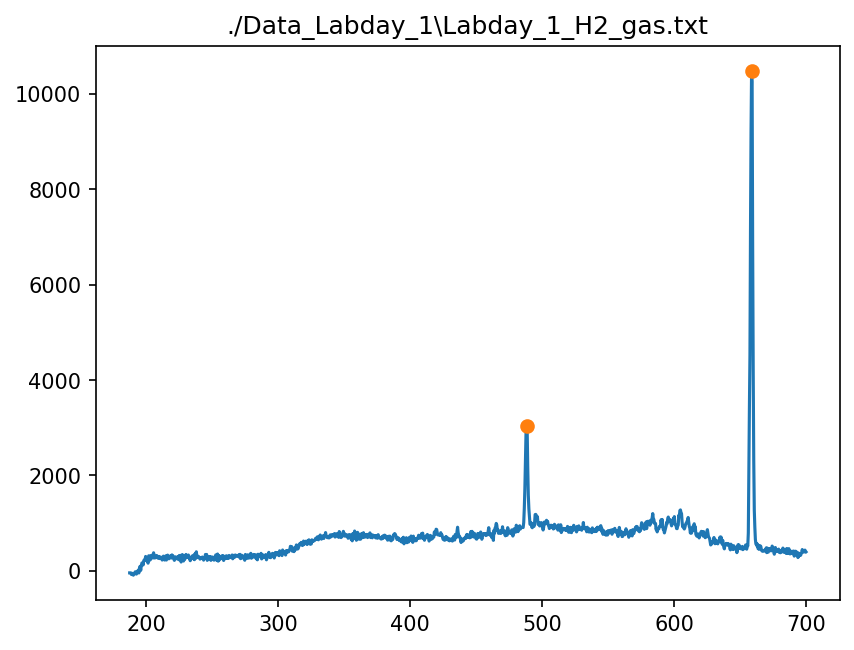

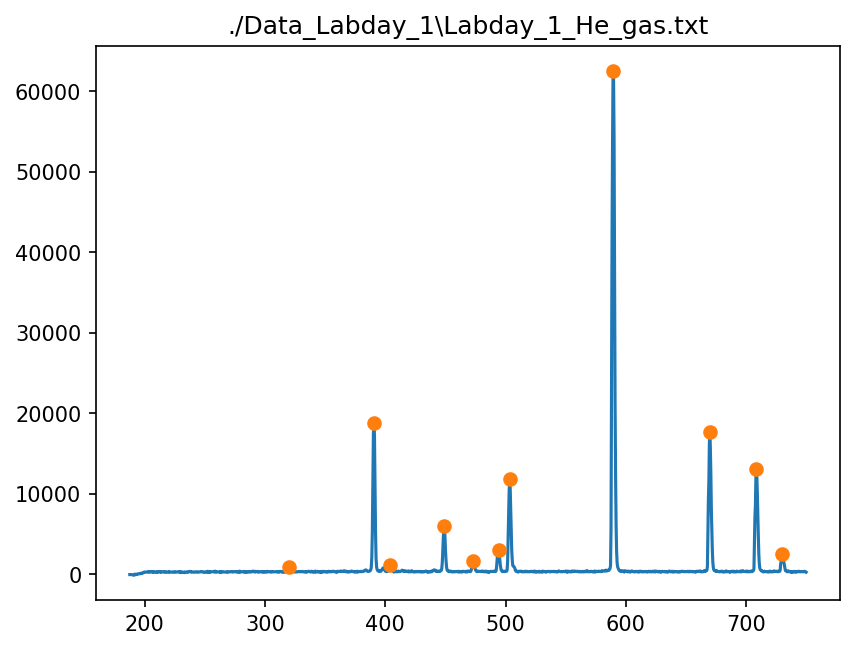

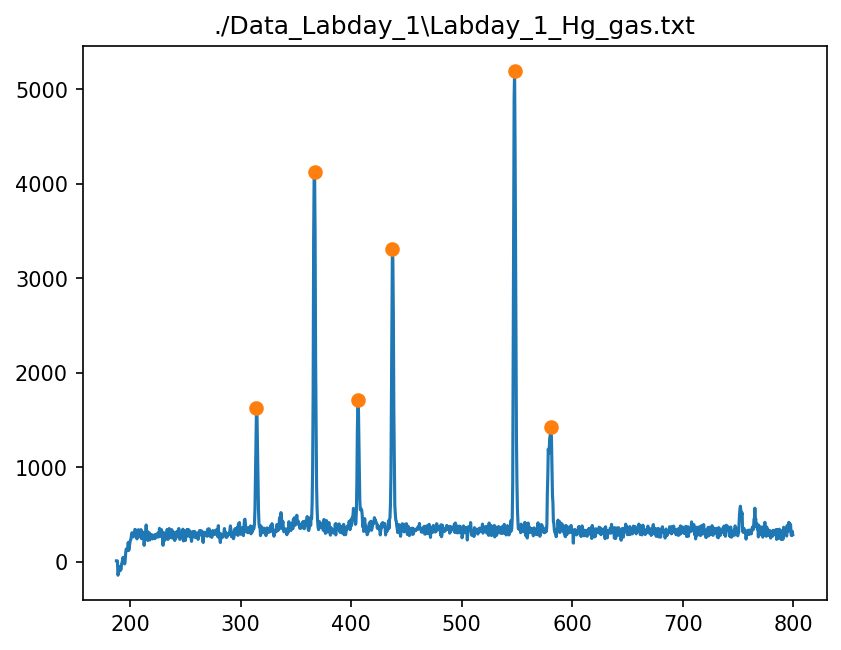

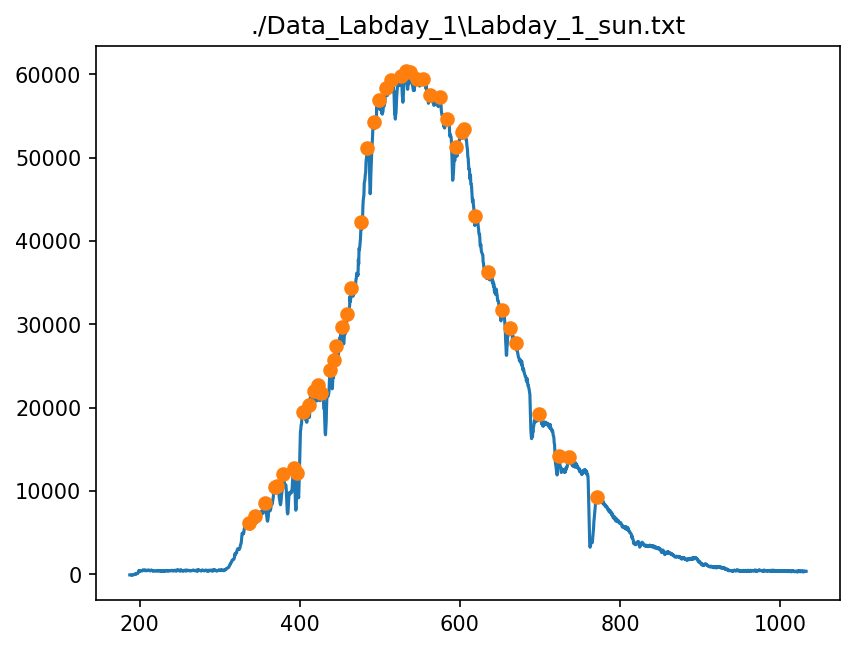

In [29]:
for i, intensity in enumerate(Intensity):
    plt.figure()
    plt.plot(wavelength[i], intensity)
    peaks, _ = find_peaks(intensity, prominence = 700)
    peaks_wavelangth = [wavelength[i][peak] for peak in peaks]
    peaks_intensity = [intensity[peak] for peak in peaks]
    plt.plot(peaks_wavelangth, peaks_intensity, 'o')
    plt.title(f'{Data_names[i]}')

[array([187.658, 188.124, 188.589, ..., 699.167, 699.572, 699.978]), array([187.658, 188.124, 188.589, ..., 749.039, 749.438, 749.836]), array([187.658, 188.124, 188.589, ..., 798.839, 799.231, 799.623]), array([ 187.658,  188.124,  188.589, ..., 1031.699, 1032.054, 1032.41 ])]
